# Machine Learning Online Class - Exercise 1: Linear Regression

## Instructions

This file contains code that helps you get started on the
linear exercise. You will need to complete the following functions
in this exericse:

* warmUpExercise.py
* plotData.py
* gradientDescent.py
* computeCost.py
* gradientDescentMulti.py
* computeCostMulti.py
* featureNormalize.py
* normalEqn.py

For this exercise, you will not need to change any code in this file,
or any other files other than those mentioned above.

x refers to the population size in 10,000s
y refers to the profit in $10,000s

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt

## WARMUPEXERCISE Example function
A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix

Instructions: Return the 5x5 identity matrix 


In [2]:
# ==================== Part 1: Basic Function ====================
def warmUpExercise():
    return np.identity(5)

print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')

print(warmUpExercise())

Running warmUpExercise ... 

5x5 Identity Matrix: 

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## PLOTDATA Plots the data points x and y into a new figure 
PLOTDATA(x,y) plots the data points and gives the figure axes labels of
population and profit.

**Instructions**: Plot the training data into a figure using the 
               "figure" and "plot" commands. Set the axes labels using
               the "xlabel" and "ylabel" commands. Assume the 
               population and revenue data have been passed in
               as the x and y arguments of this function.

**Hint**: You can use the 'rx' option with plot to have the markers
      appear as red crosses. Furthermore, you can make the
      markers larger by using plot(..., 'rx', 'MarkerSize', 10);

Plotting Training Data ...



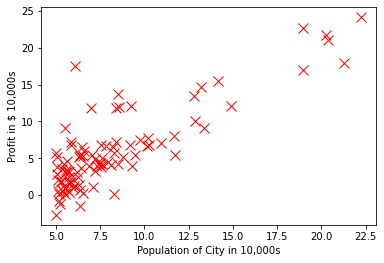

In [3]:
# ======================= Part 2: Plotting =======================
def plotData(x, y):
    plt.ylabel('Profit in $ 10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.plot(x, y, 'rx', markersize=10)
    
print('Plotting Training Data ...\n')
data = np.loadtxt('ex1data1.txt', delimiter=',');

X = data[:, 0] # Population
y = data[:, 1] # Profit
m = len(y) # number of training examples

# Plot Data
plotData(X, y)

## COMPUTECOST Compute cost for linear regression

J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y

**Instructions**: Compute the cost of a particular choice of theta
              You should set J to the cost.

In [4]:
# =================== Part 3: Cost and Gradient descent ===================
def computeCost(X, y, theta):
    m = len(y) # number of training examples
    J = 0
    
    # J = (1/(2*m)) *sum( (((X*theta)-y).^2))
    
    yT = np.array([y]).T
    J = (1.0/(2*m)) * sum(((X_padded @ theta) - yT) ** 2)
    
    return J[0]


X_padded = np.column_stack((np.ones((m,1)), X)) # Add a column of ones to X
theta = np.zeros((2, 1)) # initialize fitting parameters

print('\nTesting the cost function ...\n')

# compute and display initial cost
J = computeCost(X_padded, y, theta);
print('With theta = [0 ; 0]\nCost computed = {:f}\n'.format(J))
print('Expected cost value (approx) 32.07\n')




Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072734

Expected cost value (approx) 32.07



In [5]:
# further testing of the cost function
J = computeCost(X_padded, y, np.array([[-1], [2]]))

print('\nWith theta = [-1 ; 2]\nCost computed = {:f}\n'.format(J))
print('Expected cost value (approx) 54.24\n');


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24



## GRADIENTDESCENT Performs gradient descent to learn theta
theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
        taking num_iters gradient steps with learning rate alpha

In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    
    for iter in np.arange(num_iters):
        yT = np.array([y]).T
        theta = theta - alpha * (1.0/m) * (X.T @ ((X @ theta) - yT))
        
        J_history[iter] = computeCost(X, y, theta)
        
    return theta
    

print('\nRunning Gradient Descent ...\n')

# Some gradient descent settings
iterations = 1500
alpha = 0.01

theta = np.zeros((2, 1)) # initialize fitting parameters

# run gradient descent
theta = gradientDescent(X_padded, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n')
print(f'{theta}\n')
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n')



Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]

Expected theta values (approx)

 -3.6303
  1.1664



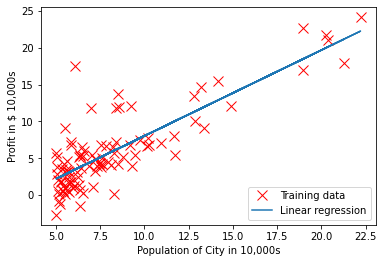

In [7]:
# Plot the linear fit
plt.ylabel('Profit in $ 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(X, y, 'rx', markersize=10)
plt.plot(X, X_padded @ theta)
plt.legend(['Training data', 'Linear regression'], loc="lower right")


In [8]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
predict1 *= 10000
print(f'For population = 35,000, we predict a profit of {predict1[0]}\n')

predict2 = np.array([1, 7]) @ theta
predict2 *= 10000
print(f'For population = 70,000, we predict a profit of {predict2[0]}\n')

For population = 35,000, we predict a profit of 4519.7678677017675

For population = 70,000, we predict a profit of 45342.45012944714



In [9]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for idx_0, val_0 in enumerate(theta0_vals):
    for idx_1, val_1 in enumerate(theta1_vals):
        t = np.array([[val_0], [val_1]])
        J_vals[idx_0, idx_1] = computeCost(X_padded, y, t) # TODO: Este array estah invertido. Nao sei por que ainda.


Visualizing J(theta_0, theta_1) ...



In [10]:
J_vals[:, 0]

array([328.09290555, 323.26504192, 318.47799046, 313.73175116,
       309.02632402, 304.36170904, 299.73790622, 295.15491557,
       290.61273708, 286.11137075, 281.65081658, 277.23107457,
       272.85214473, 268.51402704, 264.21672152, 259.96022817,
       255.74454697, 251.56967794, 247.43562106, 243.34237635,
       239.28994381, 235.27832342, 231.3075152 , 227.37751914,
       223.48833524, 219.6399635 , 215.83240392, 212.06565651,
       208.33972126, 204.65459817, 201.01028724, 197.40678847,
       193.84410187, 190.32222743, 186.84116515, 183.40091503,
       180.00147708, 176.64285128, 173.32503765, 170.04803618,
       166.81184687, 163.61646973, 160.46190474, 157.34815192,
       154.27521126, 151.24308277, 148.25176643, 145.30126226,
       142.39157025, 139.5226904 , 136.69462271, 133.90736719,
       131.16092382, 128.45529262, 125.79047358, 123.16646671,
       120.58327199, 118.04088944, 115.53931905, 113.07856082,
       110.65861475, 108.27948085, 105.9411591 , 103.64

In [11]:
"""
# To convert from Octave to Python

% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
"""

"\n# To convert from Octave to Python\n\n% Because of the way meshgrids work in the surf command, we need to\n% transpose J_vals before calling surf, or else the axes will be flipped\nJ_vals = J_vals';\n% Surface plot\nfigure;\nsurf(theta0_vals, theta1_vals, J_vals)\nxlabel('\theta_0'); ylabel('\theta_1');\n\n% Contour plot\nfigure;\n% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100\ncontour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))\nxlabel('\theta_0'); ylabel('\theta_1');\nhold on;\nplot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);\n"